In [1]:

from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

In [2]:
path = "datasets/bitly_usagov/example.txt"

In [3]:
import json
with open(path, encoding='UTF8') as f:
    records = [json.loads(line) for line in f]

In [4]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [8]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [24]:
from collections import defaultdict, Counter
counts = defaultdict(int)
tzs = []
for record in records:
    if 'tz' in record:
        counts[record['tz']] += 1
        tzs.append(record['tz'])
# l = sorted([(v, k) for k, v in counts.items()], reverse=True)

In [25]:

counter = Counter(tzs)
counter

Counter({'America/New_York': 1251,
         '': 521,
         'America/Chicago': 400,
         'America/Los_Angeles': 382,
         'America/Denver': 191,
         'Europe/London': 74,
         'Asia/Tokyo': 37,
         'Pacific/Honolulu': 36,
         'Europe/Madrid': 35,
         'America/Sao_Paulo': 33,
         'Europe/Berlin': 28,
         'Europe/Rome': 27,
         'America/Rainy_River': 25,
         'Europe/Amsterdam': 22,
         'America/Phoenix': 20,
         'America/Indianapolis': 20,
         'Europe/Warsaw': 16,
         'America/Mexico_City': 15,
         'Europe/Paris': 14,
         'Europe/Stockholm': 14,
         'America/Vancouver': 12,
         'Pacific/Auckland': 11,
         'Asia/Hong_Kong': 10,
         'Europe/Prague': 10,
         'Europe/Moscow': 10,
         'Europe/Helsinki': 10,
         'America/Puerto_Rico': 10,
         'Europe/Oslo': 10,
         'America/Montreal': 9,
         'Asia/Calcutta': 9,
         'Asia/Istanbul': 9,
         'Europe/Lisbon

In [26]:
counter.most_common(5)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191)]

In [16]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [17]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [19]:
counts = get_counts(time_zones)
counts["America/New_York"], len(time_zones)

(1251, 3440)

In [20]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [21]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [11]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

In [5]:
frame = pd.DataFrame(records)
frame.head(5)

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) C...",US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/031612.cfm,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/534.52.7 (KHTML, ...",BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) C...",US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/134127368672998.png,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [6]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [7]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [8]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ""] = 'Unknow'


In [9]:
tz_counts = clean_tz.value_counts()
tz_counts.head()

tz
America/New_York       1251
Unknow                  521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

<Axes: ylabel='tz'>

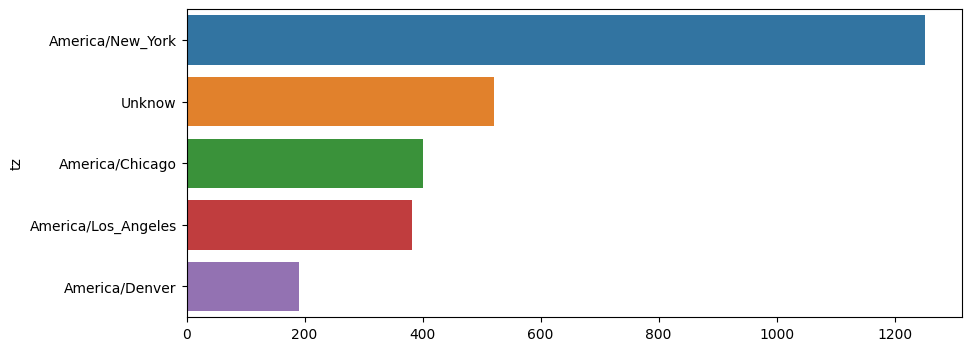

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 4))
subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy(), hue=subset.index)
# sns.barplot(x=subset.index, y=subset.to_numpy())

In [16]:
frame["a"][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [17]:
results = pd.Series([x.split(' ')[0] for x in frame['a'].dropna()])
results.head(5)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [18]:
results.value_counts().head(5)

Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
Name: count, dtype: int64

In [19]:
cframe = frame[frame["a"].notna()].copy()
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
cframe.head(5)

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,os
0,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) C...",US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/031612.cfm,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Windows
3,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/534.52.7 (KHTML, ...",BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Not Windows
4,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) C...",US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/134127368672998.png,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Windows


In [21]:
group_tz_os = cframe.groupby(['tz', 'os'])
agg_counts = group_tz_os.size()
agg_counts

tz                 os         
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
                                 ... 
Europe/Warsaw      Windows         15
Europe/Zurich      Not Windows      4
Pacific/Auckland   Not Windows      3
                   Windows          8
Pacific/Honolulu   Windows         36
Length: 149, dtype: int64

In [23]:
agg_counts = agg_counts.unstack().fillna(0)
agg_counts.head(5)

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [27]:
indexer = agg_counts.sum(axis=1).argsort()
indexer[-10:]

tz
Europe/Sofia        35
Europe/Stockholm    78
Europe/Uzhgorod     96
Europe/Vienna       59
Europe/Vilnius      77
Europe/Volgograd    15
Europe/Warsaw       22
Europe/Zurich       12
Pacific/Auckland     0
Pacific/Honolulu    29
dtype: int64

In [31]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [29]:
agg_counts.sum(axis=1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

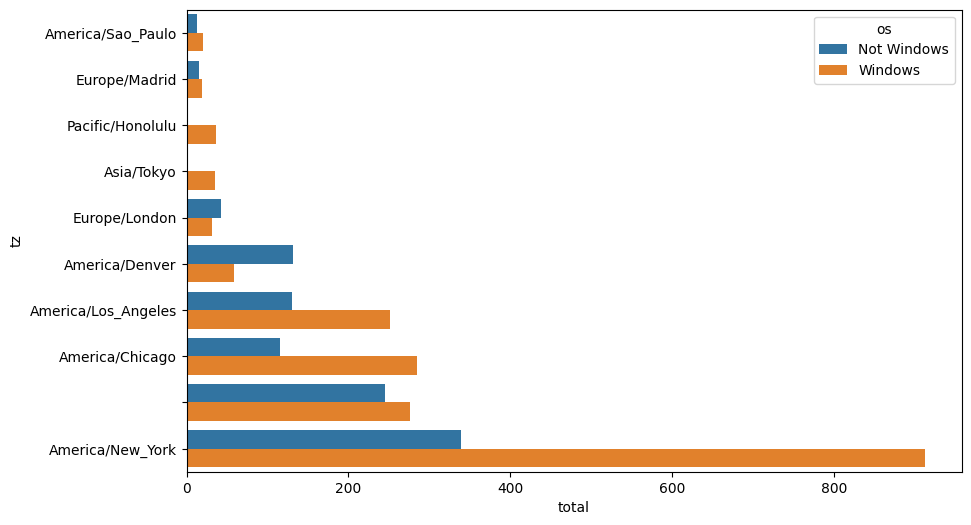

In [36]:
plt.figure(figsize=(10, 6))
temp = count_subset.stack()
temp.name = 'total'
temp = temp.reset_index()
sns.barplot(x='total', y='tz', hue='os', data=temp)
plt.show()

In [42]:
g = temp.groupby('tz')
temp['rate'] =  temp['total'] / g['total'].transform('sum')
temp

,tz,os,total,rate
0,America/Sao_Paulo,Not Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061
2,Europe/Madrid,Not Windows,16.0,0.457143
3,Europe/Madrid,Windows,19.0,0.542857
4,Pacific/Honolulu,Not Windows,0.0,0.000000
5,Pacific/Honolulu,Windows,36.0,1.000000
6,Asia/Tokyo,Not Windows,2.0,0.054054
7,Asia/Tokyo,Windows,35.0,0.945946
8,Europe/London,Not Windows,43.0,0.581081
9,Europe/London,Windows,31.0,0.418919


In [44]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = temp.groupby("tz").apply(norm_total)

In [45]:
results

tz           os  total      rate  \
tz                                                                          
                    16                       Not Windows  245.0  0.470250   
                    17                           Windows  276.0  0.529750   
America/Chicago     14      America/Chicago  Not Windows  115.0  0.287500   
                    15      America/Chicago      Windows  285.0  0.712500   
America/Denver      10       America/Denver  Not Windows  132.0  0.691099   
                    11       America/Denver      Windows   59.0  0.308901   
America/Los_Angeles 12  America/Los_Angeles  Not Windows  130.0  0.340314   
                    13  America/Los_Angeles      Windows  252.0  0.659686   
America/New_York    18     America/New_York  Not Windows  339.0  0.270983   
                    19     America/New_York      Windows  912.0  0.729017   
America/Sao_Paulo   0     America/Sao_Paulo  Not Windows   13.0  0.393939   
                    1     America/Sao_Paulo      Windows   20.0  0.606061   
Asia/Tokyo          6            Asia/Tokyo  Not Windows    2.0  0.054054   
                    7            Asia/Tokyo      Windows   35.0  0.945946   
Europe/London       8         Europe/London  Not Windows   43.0  0.581081   
                    9         Europe/London      Windows   31.0  0.418919   
Europe/Madrid       2         Europe/Madrid  Not Windows   16.0  0.457143   
                    3         Europe/Madrid      Windows   19.0  0.542857   
Pacific/Honolulu    4      Pacific/Honolulu  Not Windows    0.0  0.000000   
                    5      Pacific/Honolulu      Windows   36.0  1.000000   

                        normed_total  
tz                                    
                    16      0.470250  
                    17      0.529750  
America/Chicago     14      0.287500  
                    15      0.712500  
America/Denver      10      0.691099  
                    11      0.308901  
America/Los_Angeles 12      0.340314  
                    13      0.659686  
America/New_York    18      0.270983  
                    19      0.729017  
America/Sao_Paulo   0       0.393939  
                    1       0.606061  
Asia/Tokyo          6       0.054054  
                    7       0.945946  
Europe/London       8       0.581081  
                    9       0.418919  
Europe/Madrid       2       0.457143  
                    3       0.542857  
Pacific/Honolulu    4       0.000000  
                    5       1.000000

<Axes: xlabel='rate', ylabel='tz'>

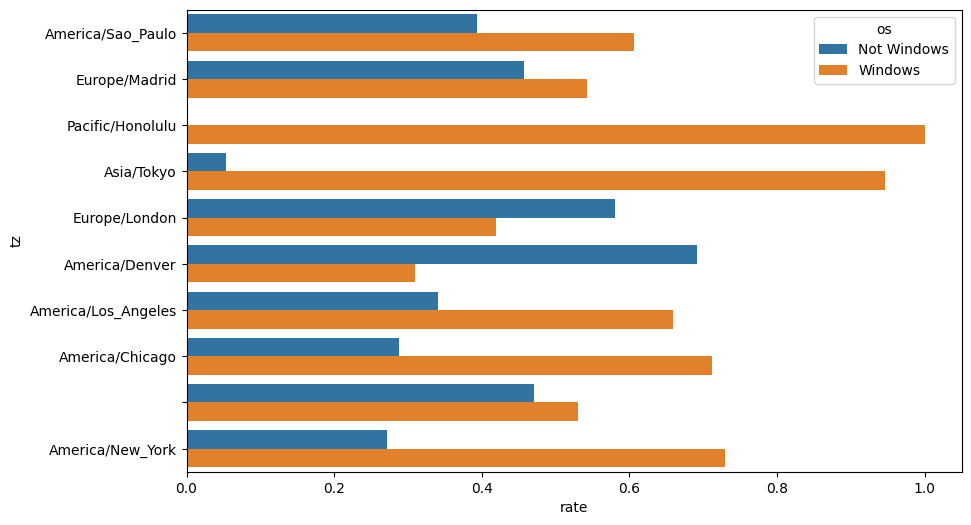

In [46]:
sns.barplot(x='rate', y='tz', hue='os', data=temp)

In [32]:
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")

In [33]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("datasets/movielens/users.dat", sep="::",
                      header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("datasets/movielens/ratings.dat", sep="::",
                        header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("datasets/movielens/movies.dat", sep="::",
                       header=None, names=mnames, engine="python")

In [34]:
users.head(5)
ratings.head(5)
movies.head(5)
ratings

In [35]:
data = pd.merge(pd.merge(ratings, users), movies)
data
data.iloc[0]

In [36]:
mean_ratings = data.pivot_table("rating", index="title",
                                columns="gender", aggfunc="mean")
mean_ratings.head(5)

In [37]:
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

In [38]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

In [39]:
mean_ratings = mean_ratings.rename(index={"Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)":
                           "Seven Samurai (Shichinin no samurai) (1954)"})

In [40]:
top_female_ratings = mean_ratings.sort_values("F", ascending=False)
top_female_ratings.head()

In [41]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

In [42]:
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head()

In [43]:
sorted_by_diff[::-1].head()

In [44]:
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

In [45]:
rating_std_by_title.sort_values(ascending=False)[:10]

In [46]:
movies["genres"].head()
movies["genres"].head().str.split("|")
movies["genre"] = movies.pop("genres").str.split("|")
movies.head()

In [47]:
movies_exploded = movies.explode("genre")
movies_exploded[:10]

In [48]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.iloc[0]
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])
                 ["rating"].mean()
                 .unstack("age"))
genre_ratings[:10]

In [49]:
!head -n 10 datasets/babynames/yob1880.txt

In [50]:
names1880 = pd.read_csv("datasets/babynames/yob1880.txt",
                        names=["name", "sex", "births"])
names1880

In [51]:
names1880.groupby("sex")["births"].sum()

In [52]:
pieces = []
for year in range(1880, 2011):
    path = f"datasets/babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    # Add a column for the year
    frame["year"] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [53]:
names

In [54]:
total_births = names.pivot_table("births", index="year",
                                 columns="sex", aggfunc=sum)
total_births.tail()
total_births.plot(title="Total births by sex and year")

In [55]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group
names = names.groupby(["year", "sex"], group_keys=False).apply(add_prop)

In [56]:
names

In [57]:
names.groupby(["year", "sex"])["prop"].sum()

In [58]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]
grouped = names.groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000)
top1000.head()

In [59]:
top1000 = top1000.reset_index(drop=True)

In [60]:
top1000.head()

In [61]:
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]

In [62]:
total_births = top1000.pivot_table("births", index="year",
                                   columns="name",
                                   aggfunc=sum)

In [63]:
total_births.info()
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
subset.plot(subplots=True, figsize=(12, 10),
            title="Number of births per year")

In [64]:
plt.figure()

In [65]:
table = top1000.pivot_table("prop", index="year",
                            columns="sex", aggfunc=sum)
table.plot(title="Sum of table1000.prop by year and sex",
           yticks=np.linspace(0, 1.2, 13))

In [66]:
df = boys[boys["year"] == 2010]
df

In [67]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
prop_cumsum[:10]
prop_cumsum.searchsorted(0.5)

In [68]:
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

In [69]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()

In [70]:
fig = plt.figure()

In [71]:
diversity.head()
diversity.plot(title="Number of popular names in top 50%")

In [72]:
def get_last_letter(x):
    return x[-1]

last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"

table = names.pivot_table("births", index=last_letters,
                          columns=["sex", "year"], aggfunc=sum)

In [73]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable.head()

In [74]:
subtable.sum()
letter_prop = subtable / subtable.sum()
letter_prop

In [75]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female",
                      legend=False)

In [76]:
plt.subplots_adjust(hspace=0.25)

In [77]:
letter_prop = table / table.sum()

dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T
dny_ts.head()

In [78]:
plt.close("all")

In [79]:
fig = plt.figure()

In [80]:
dny_ts.plot()

In [81]:
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

In [82]:
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

In [83]:
table = filtered.pivot_table("births", index="year",
                             columns="sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")
table.tail()

In [84]:
fig = plt.figure()

In [85]:
table.plot(style={"M": "k-", "F": "k--"})

In [86]:
import json
db = json.load(open("datasets/usda_food/database.json"))
len(db)

In [87]:
db[0].keys()
db[0]["nutrients"][0]
nutrients = pd.DataFrame(db[0]["nutrients"])
nutrients.head(7)

In [88]:
info_keys = ["description", "group", "id", "manufacturer"]
info = pd.DataFrame(db, columns=info_keys)
info.head()
info.info()

In [89]:
pd.value_counts(info["group"])[:10]

In [90]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [91]:
nutrients

In [92]:
nutrients.duplicated().sum()  # number of duplicates
nutrients = nutrients.drop_duplicates()

In [93]:
col_mapping = {"description" : "food",
               "group"       : "fgroup"}
info = info.rename(columns=col_mapping, copy=False)
info.info()
col_mapping = {"description" : "nutrient",
               "group" : "nutgroup"}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

In [94]:
ndata = pd.merge(nutrients, info, on="id")
ndata.info()
ndata.iloc[30000]

In [95]:
fig = plt.figure()

In [96]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)
result["Zinc, Zn"].sort_values().plot(kind="barh")

In [97]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])

def get_maximum(x):
    return x.loc[x.value.idxmax()]

max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

# make the food a little smaller
max_foods["food"] = max_foods["food"].str[:50]

In [98]:
max_foods.loc["Amino Acids"]["food"]

In [99]:
fec = pd.read_csv("datasets/fec/P00000001-ALL.csv", low_memory=False)
fec.info()

In [100]:
fec.iloc[123456]

In [101]:
unique_cands = fec["cand_nm"].unique()
unique_cands
unique_cands[2]

In [102]:
parties = {"Bachmann, Michelle": "Republican",
           "Cain, Herman": "Republican",
           "Gingrich, Newt": "Republican",
           "Huntsman, Jon": "Republican",
           "Johnson, Gary Earl": "Republican",
           "McCotter, Thaddeus G": "Republican",
           "Obama, Barack": "Democrat",
           "Paul, Ron": "Republican",
           "Pawlenty, Timothy": "Republican",
           "Perry, Rick": "Republican",
           "Roemer, Charles E. 'Buddy' III": "Republican",
           "Romney, Mitt": "Republican",
           "Santorum, Rick": "Republican"}

In [103]:
fec["cand_nm"][123456:123461]
fec["cand_nm"][123456:123461].map(parties)
# Add it as a column
fec["party"] = fec["cand_nm"].map(parties)
fec["party"].value_counts()

In [104]:
(fec["contb_receipt_amt"] > 0).value_counts()

In [105]:
fec = fec[fec["contb_receipt_amt"] > 0]

In [106]:
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]

In [107]:
fec["contbr_occupation"].value_counts()[:10]

In [108]:
occ_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
   "C.E.O.": "CEO"
}

def get_occ(x):
    # If no mapping provided, return x
    return occ_mapping.get(x, x)

fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)

In [109]:
emp_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "SELF" : "SELF-EMPLOYED",
   "SELF EMPLOYED" : "SELF-EMPLOYED",
}

def get_emp(x):
    # If no mapping provided, return x
    return emp_mapping.get(x, x)

fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)

In [110]:
by_occupation = fec.pivot_table("contb_receipt_amt",
                                index="contbr_occupation",
                                columns="party", aggfunc="sum")
over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2000000]
over_2mm

In [111]:
plt.figure()

In [112]:
over_2mm.plot(kind="barh")

In [113]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)["contb_receipt_amt"].sum()
    return totals.nlargest(n)

In [114]:
grouped = fec_mrbo.groupby("cand_nm")
grouped.apply(get_top_amounts, "contbr_occupation", n=7)
grouped.apply(get_top_amounts, "contbr_employer", n=10)

In [115]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100_000, 1_000_000, 10_000_000])
labels = pd.cut(fec_mrbo["contb_receipt_amt"], bins)
labels

In [116]:
grouped = fec_mrbo.groupby(["cand_nm", labels])
grouped.size().unstack(level=0)

In [117]:
plt.figure()

In [118]:
bucket_sums = grouped["contb_receipt_amt"].sum().unstack(level=0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis="columns"),
                              axis="index")
normed_sums
normed_sums[:-2].plot(kind="barh")

In [119]:
grouped = fec_mrbo.groupby(["cand_nm", "contbr_st"])
totals = grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0)
totals = totals[totals.sum(axis="columns") > 100000]
totals.head(10)

In [120]:
percent = totals.div(totals.sum(axis="columns"), axis="index")
percent.head(10)